In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..")

from tools.gaussian_process import GPR
from tools.general_utils import plot_data
from tools.reader import get_simulation_data
from tools.numeric_utils import cubic_integration
from tools.multi_fidelity import get_lf_training_data

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.


# 2D - GPR


In [4]:
path = "../../master_thesis/Mixtures/mixture_hexane_butylamine/373/hexane_coupled/x%.1f/vdw/TI/sim_%d/fep%d%d.sampling"
compositions = [ 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
lambdas      = [ 0.0, 0.1, 0.13, 0.17, 0.21, 0.26, 0.3, 0.34, 0.38, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9, 1.0 ]

x_pred = np.linspace(0,1,21)

free_energy_obj, density = get_simulation_data( path, compositions, lambdas, True, delta=0.0001 )
            
settings_dict = { "component": "hexane", "dimension": 1, "x_pred": x_pred,  "fix_hf_noise": True, "verbose":False }

free_energy_obj.gpr( **settings_dict  )

# Integrate the high fidelity data
delta_G, delta_G_var = free_energy_obj.integrate( integration_method = "cubicspline" )

Collect simulation data for composition: 0.0


Collect simulation data for composition: 0.1
Collect simulation data for composition: 0.2
Collect simulation data for composition: 0.3
Collect simulation data for composition: 0.4
Collect simulation data for composition: 0.5
Collect simulation data for composition: 0.6
Collect simulation data for composition: 0.7
Collect simulation data for composition: 0.8
Collect simulation data for composition: 0.9
Collect simulation data for composition: 1.0

1D GPR for component: hexane

Optimization restart 1/3, f = -21.617724301995658
Optimization restart 2/3, f = -21.61772430191609
Optimization restart 3/3, f = -21.617724302027668
Optimization restart 1/3, f = -21.911173383182373
Optimization restart 2/3, f = -21.911173383181016
Optimization restart 3/3, f = -21.91117338319397
Optimization restart 1/3, f = -22.886517007665958
Optimization restart 2/3, f = -22.88651700766533
Optimization restart 3/3, f = -22.886517007660743
Optimization restart 1/3, f = -22.957057891078875
Optimization restart 2

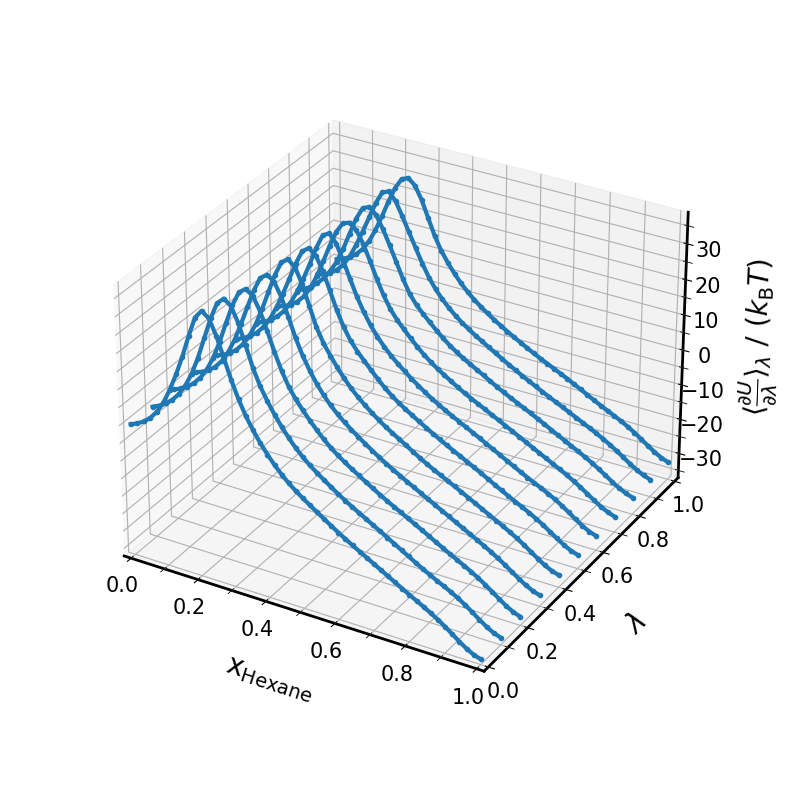

In [6]:
free_energy_obj.plot( ["x$_\mathrm{Hexane}$", "$\lambda$","$ \\langle \\frac{\partial U}{\partial \lambda} \\rangle_{\lambda} \ / \ (k_\mathrm{B}T)$"] ,plot_3d=True )

# 2D Linear multi-fidelity GPR

In [108]:
path = "../../master_thesis/Mixtures/mixture_hexane_butylamine/373/hexane_coupled/x%.1f/vdw/TI/sim_%d/fep%d%d.sampling"
compositions = [ 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
lambdas      = [ 0.0, 0.1, 0.13, 0.17, 0.21, 0.26, 0.3, 0.34, 0.38, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9, 1.0 ]

free_energy_obj, density = get_simulation_data( path, compositions, lambdas, True, delta=0.0001 )

X = np.concatenate( [np.column_stack( ( _ ) ) for _ in zip( free_energy_obj.lambdas ,free_energy_obj.compositions ) ] )
Y = np.concatenate( (free_energy_obj.dh_dl) ).reshape(-1,1)
Y_std = np.concatenate( (free_energy_obj.var_dh_dl) ).reshape(-1,1)

lf_databank = "../input_files/multifidelity/lf_vdw_data_mix.json"
lf_mixture  = "mie1_mie2"
lf_unique_key = "100_0"
lf_component = "mie1"

settings_dict = {"lf_databank": lf_databank, "lf_mixture": lf_mixture, "lf_unique_key": lf_unique_key, "lf_component": lf_component }

lf_lambdas, lf_compositions, lf_dh_dl = get_lf_training_data( **settings_dict )
            
settings_dict = { "component": "hexane", "lf_compositions": lf_compositions, "lf_lambdas": lf_lambdas, "lf_dh_dl": lf_dh_dl,
                    "dimension": 2, "x_pred": x_pred,  "fix_hf_noise": True }

free_energy_obj.multifidelity( **settings_dict  )

# Integrate the high fidelity data
delta_G, delta_G_var = free_energy_obj.integrate( integration_method = "cubicspline" )

Collect simulation data for composition: 0.0
Collect simulation data for composition: 0.1
Collect simulation data for composition: 0.2
Collect simulation data for composition: 0.3
Collect simulation data for composition: 0.4
Collect simulation data for composition: 0.5
Collect simulation data for composition: 0.6
Collect simulation data for composition: 0.7
Collect simulation data for composition: 0.8
Collect simulation data for composition: 0.9
Collect simulation data for composition: 1.0

2D Multi-fidelity modeling for component: hexane

Optimization restart 1/2, f = 228.95048536103667
Optimization restart 2/2, f = 229.01941915009797


In [111]:
# --> seems like not much of a difference between GPR and linear multi fidelity

([-4.050712498756609,
  -4.111396527852901,
  -4.169536718935723,
  -4.224792511737064,
  -4.27682574685312,
  -4.325333194984798,
  -4.370064375204223,
  -4.410734101083492,
  -4.446951044280626,
  -4.478290392677034,
  -4.504404588723464,
  -4.525058422374336,
  -4.540140480505353,
  -4.549797763845408,
  -4.554473228166207,
  -4.554811971077227,
  -4.551558095462156,
  -4.545350349152285,
  -4.536566140886783,
  -4.525436466027962,
  -4.512144377857339],
 array([-4.0531194 , -4.11339123, -4.17125261, -4.22625558, -4.27814268,
        -4.3267237 , -4.37183234, -4.41320035, -4.4500625 , -4.48164505,
        -4.50772771, -4.52817682, -4.5425563 , -4.55071611, -4.55364516,
        -4.55259708, -4.54851923, -4.5421657 , -4.533681  , -4.52307645,
        -4.51046658]))